In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Loan_prediction.csv")
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
df['Dependents'] = df['Dependents'].astype(np.int)

In [4]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Check Missing Values

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [9]:
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64

Check Skewness

In [10]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Loan_Status         -0.809998
dtype: float64

# EDA

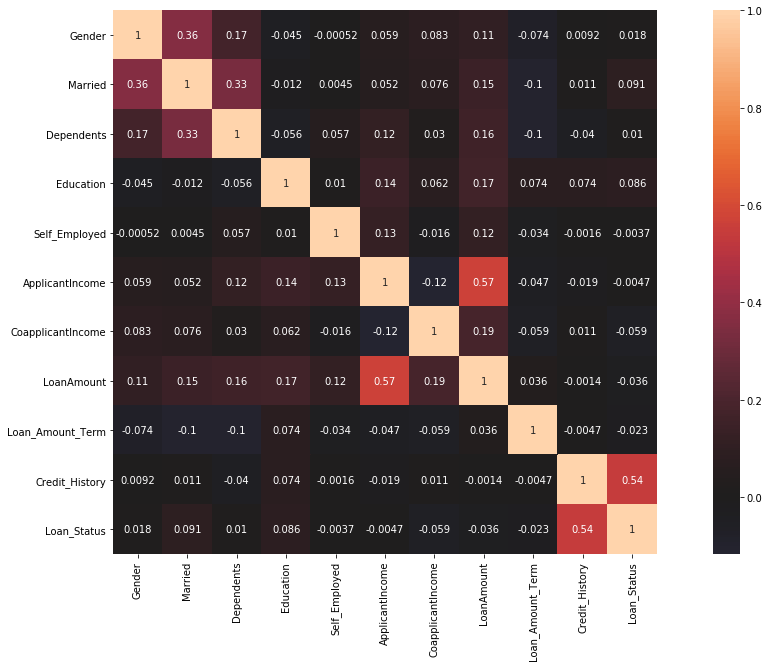

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,square=True,center=0)
plt.show()

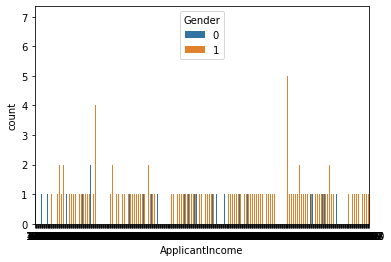

In [12]:
sns.countplot(df['ApplicantIncome'],hue=df['Gender'])

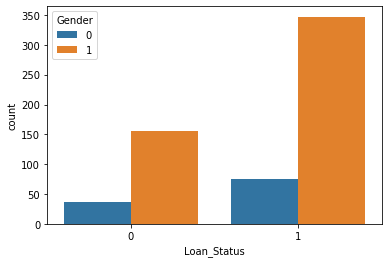

In [13]:
sns.countplot(df['Loan_Status'],hue=df['Gender'])

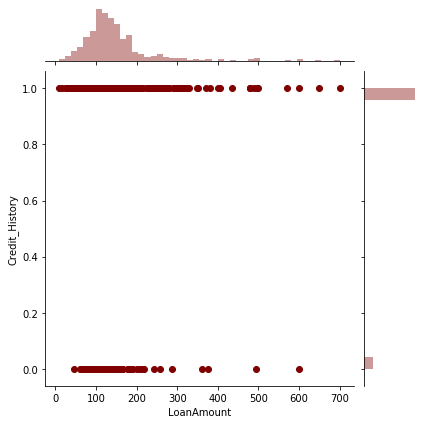

In [14]:
sns.jointplot(x='LoanAmount',y='Credit_History',data=df, color='maroon')

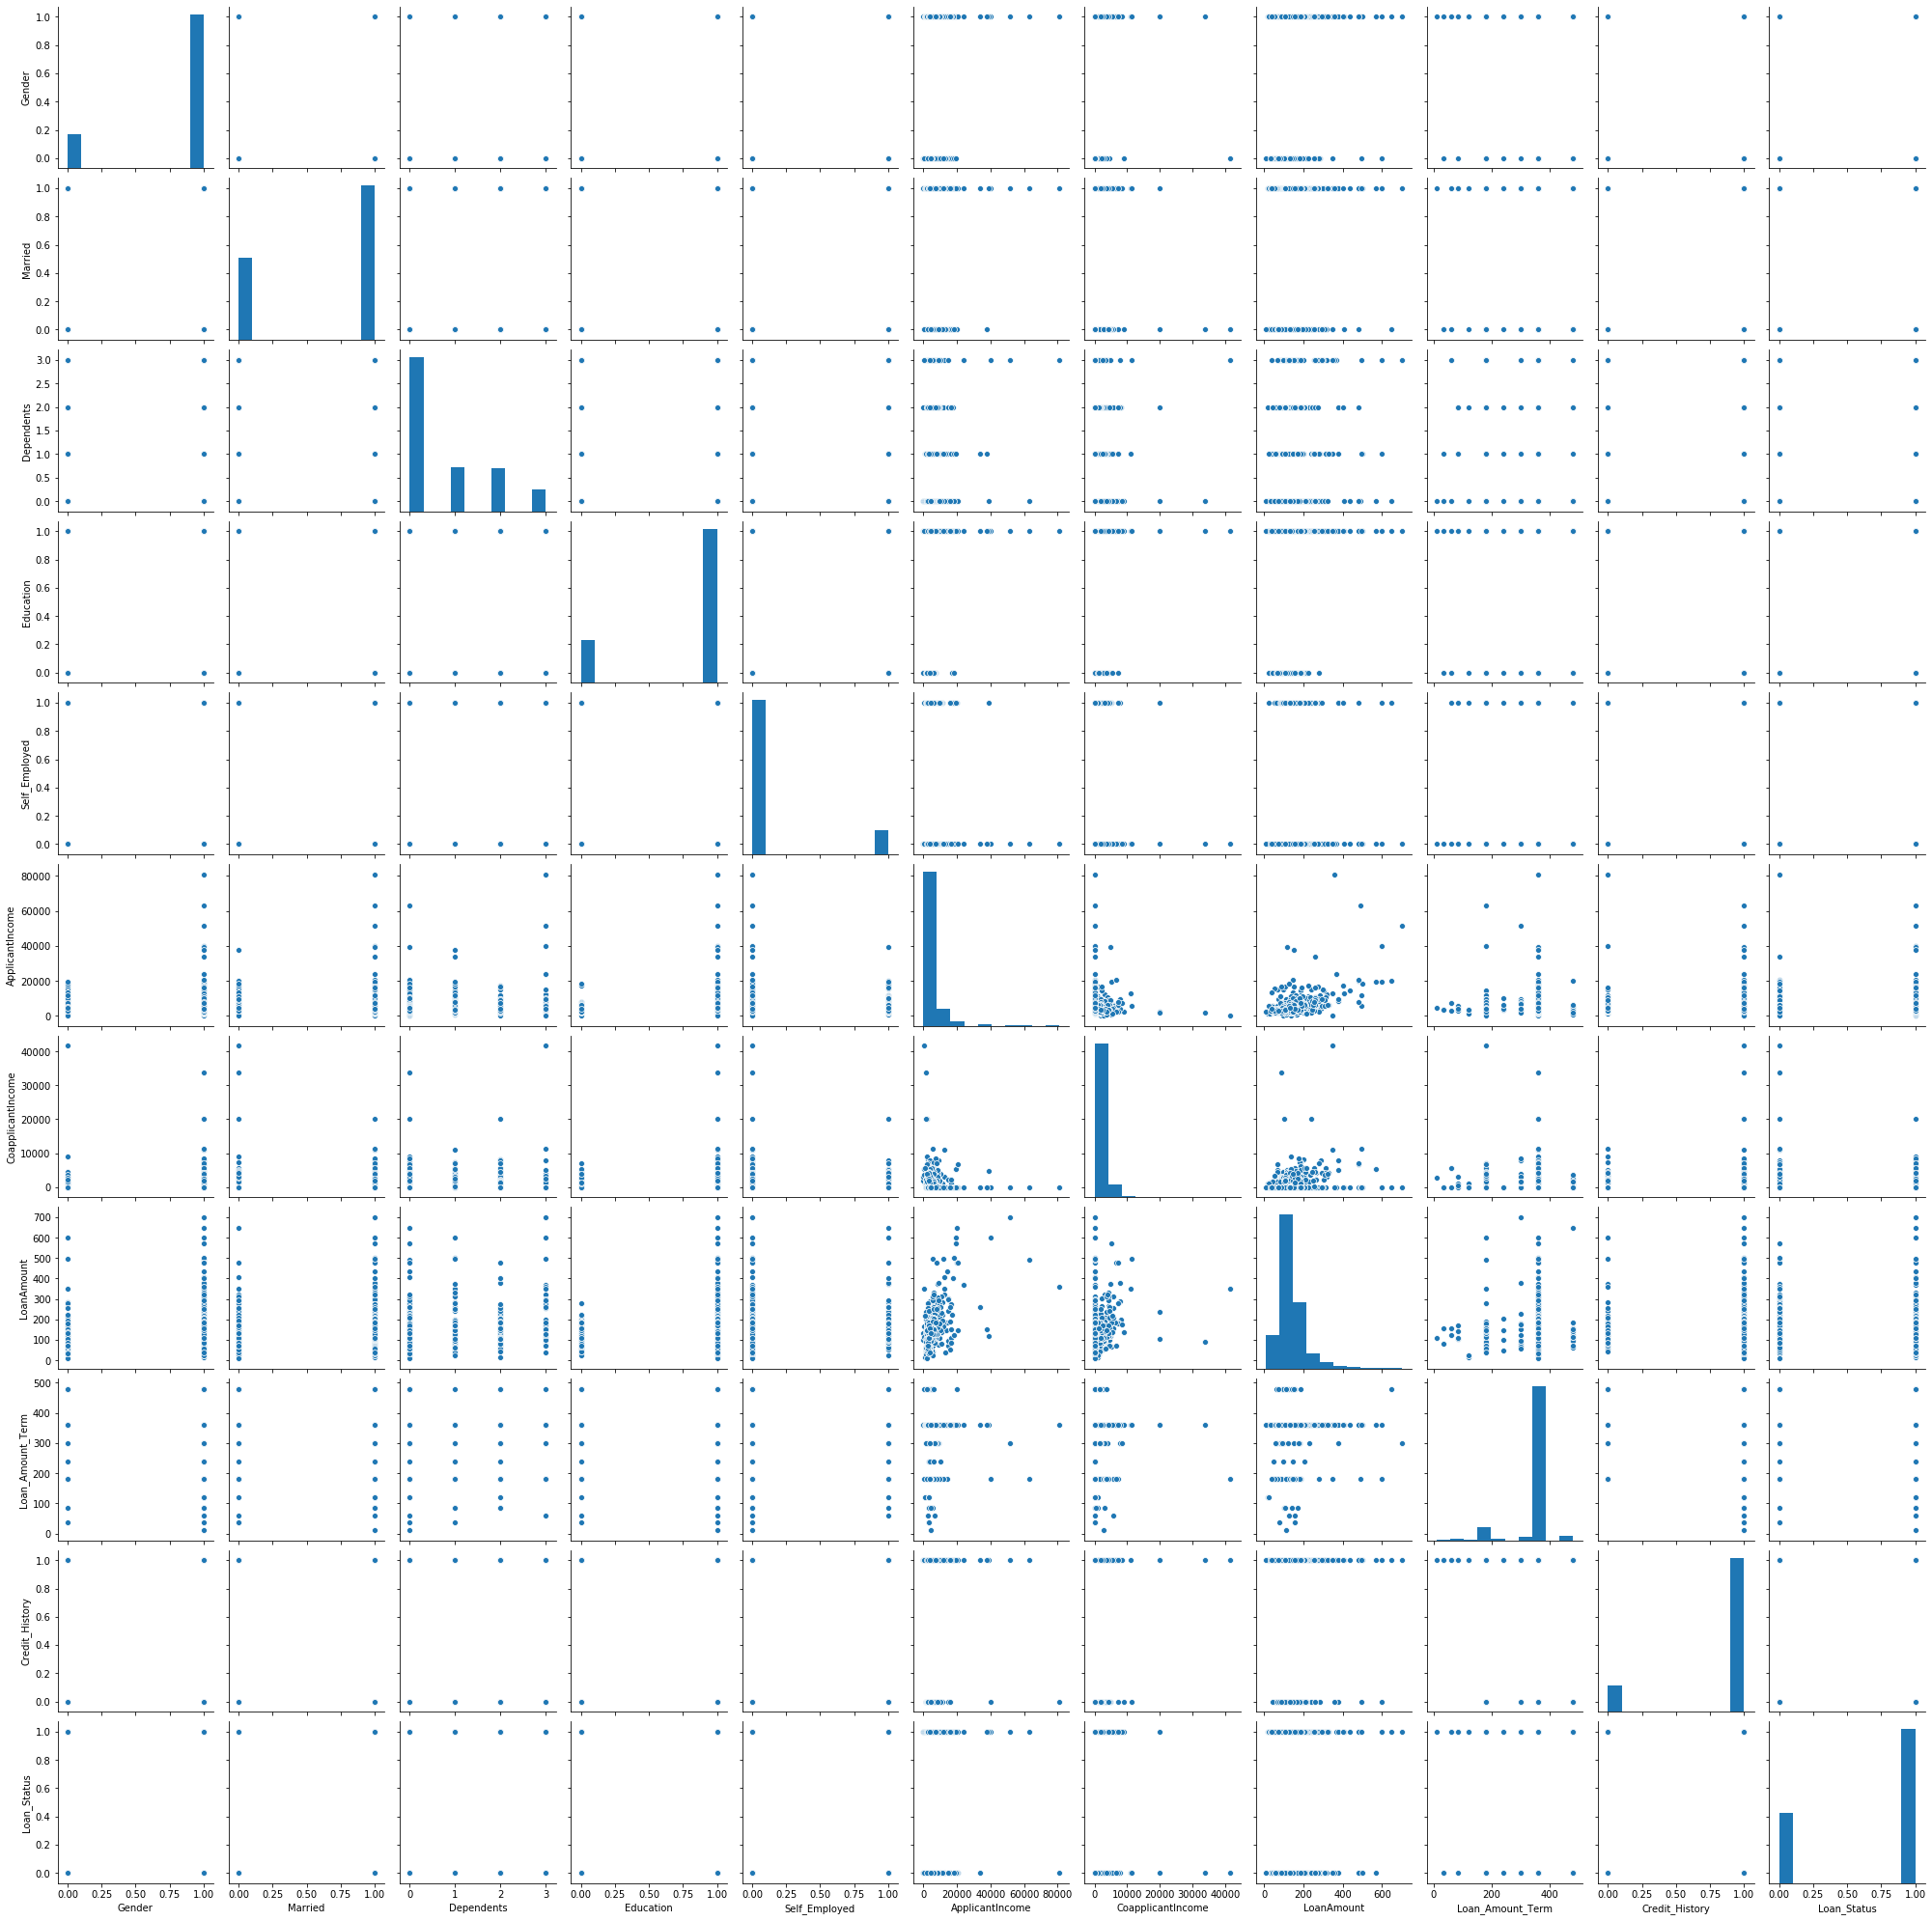

In [15]:
sns.pairplot(df)

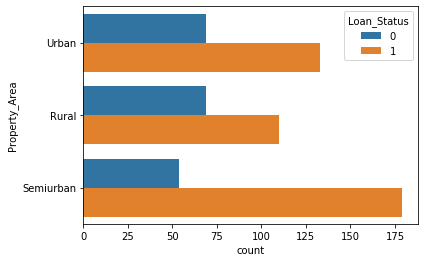

In [16]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=df)

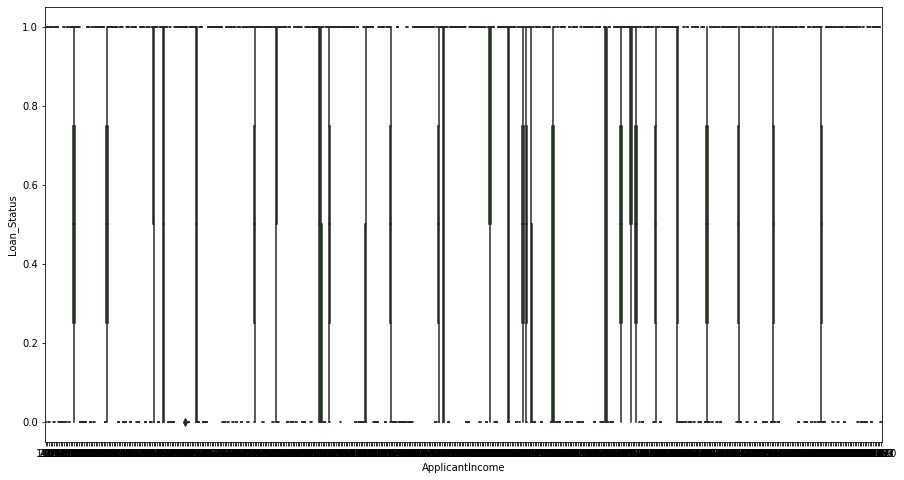

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.boxplot(x='ApplicantIncome',y='Loan_Status',data=df,color='green')

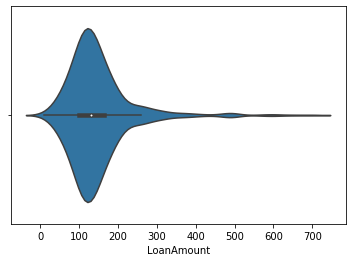

In [18]:
sns.violinplot(x="LoanAmount", data=df)
plt.show()

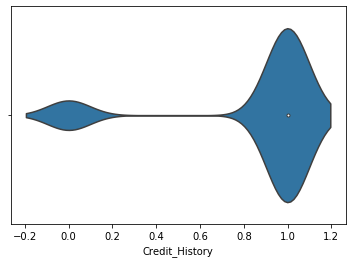

In [19]:
sns.violinplot(x="Credit_History", data=df)
plt.show()

Text(0.5, 1.0, 'LoanAmount with respect to ApplicantIncome')

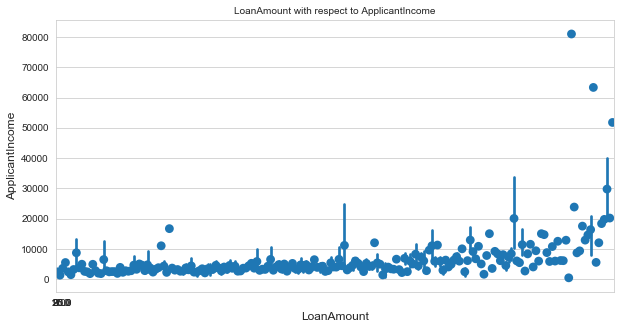

In [20]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.pointplot(x='LoanAmount',y='ApplicantIncome',data=df,join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('LoanAmount',{'fontsize' : 'large'})
plt.ylabel('ApplicantIncome',{'fontsize':'large'})
plt.title("LoanAmount with respect to ApplicantIncome",{'fontsize':10})

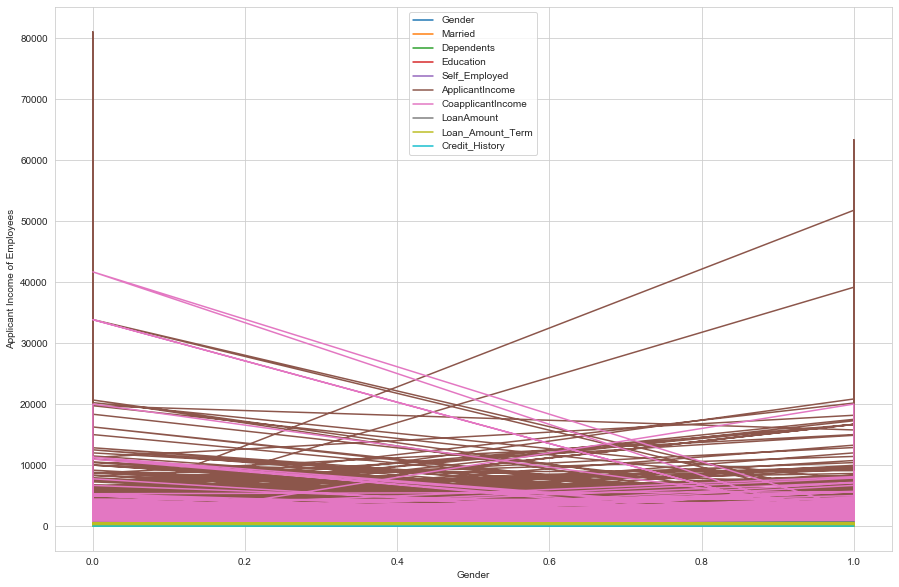

In [21]:
ax = df.set_index('Loan_Status').plot(figsize=(15, 10))
ax.set_ylabel('Applicant Income of Employees')
ax.set_xlabel('Gender')

plt.show()

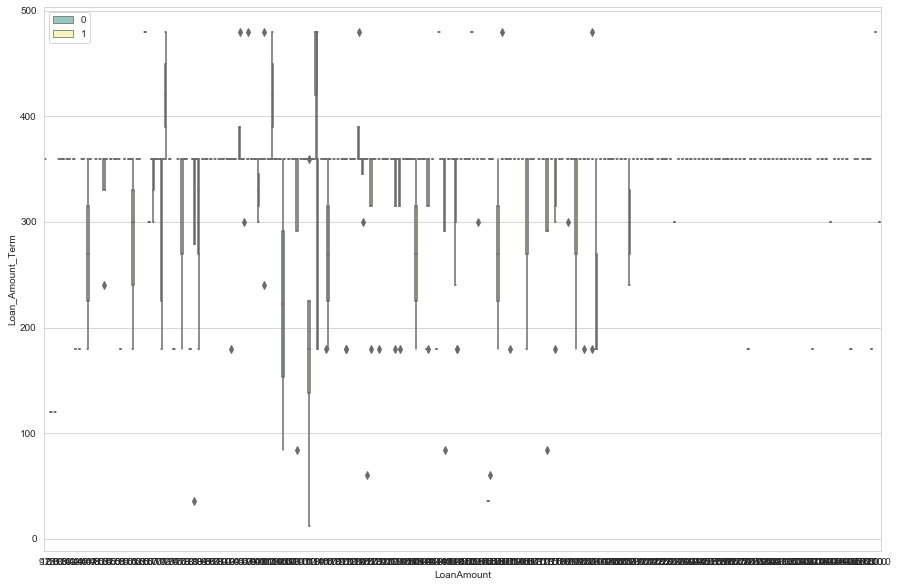

In [22]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='LoanAmount', y='Loan_Amount_Term', data=df, hue='Gender',palette='Set3')
plt.legend(loc='best')
plt.show()

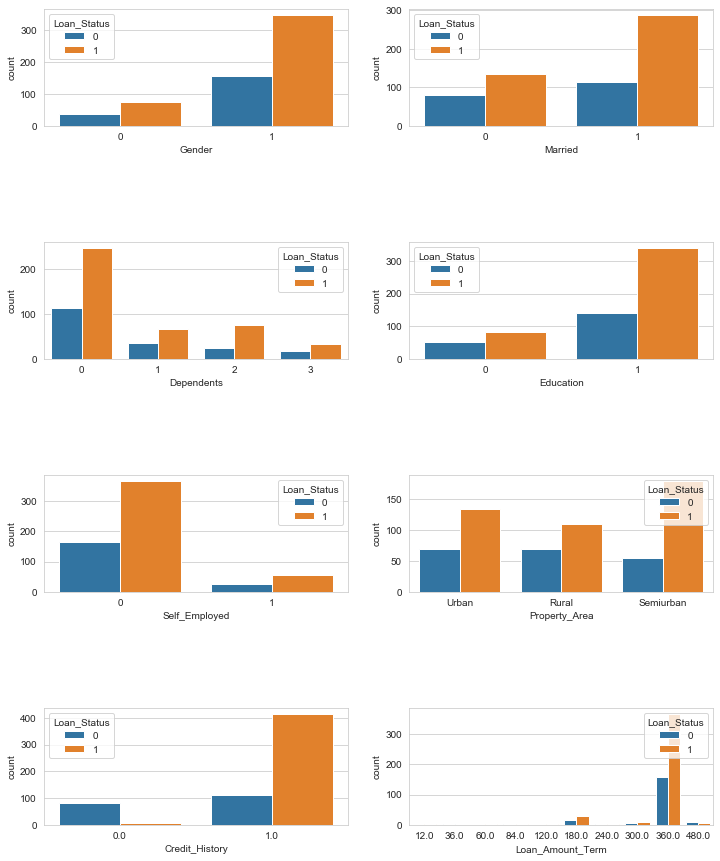

In [23]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

Preprocessing Data

In [24]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
x = df_encoded.drop(columns='Loan_Status')
y = df_encoded['Loan_Status']

Train_Test_Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify =y,random_state =42)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
ypred = model.predict(x_test)

In [30]:
evaluation = f1_score(y_test, ypred)
evaluation

0.9081081081081082

Using Decision Tree

In [31]:
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


In [32]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
ypred_dt=dt.predict(x_test)
print(ypred_dt)

[0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 0 0 0 0]


In [34]:
evaluation_dt=f1_score(y_test, ypred_dt)
evaluation_dt

0.8192771084337349

Using Random Forest Classifier

In [35]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8140096618357487
Train Accuracy  0.6863543788187373
Validation Mean F1 Score:  0.4070012002282401
Validation Mean Accuracy:  0.686353329210472


In [36]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
ypred_rf=rf.predict(x_test)
print(ypred_rf)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0]


In [38]:
evaluation_rf=f1_score(y_test, ypred_rf)
evaluation_rf

0.903225806451613

In [39]:
predictions=model.predict(x_test)

In [40]:
print('Classfication Report - \n',classification_report(y_test,predictions))
print('\n')
print('confusion_matrix  - \n',confusion_matrix(y_test,predictions))

Classfication Report - 
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



confusion_matrix  - 
 [[22 16]
 [ 1 84]]


In [41]:
print('Accuracy of the Model -',accuracy_score(y_test,predictions))

Accuracy of the Model - 0.8617886178861789


In [43]:
from sklearn.externals import joblib
joblib.dump(model,'Loan_Prediction.obj')

['Loan_Prediction.obj']